In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("usedcar.csv")

In [3]:
df.head()

,text,model,zip,price,mileage
0,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,c21411,10005,"7,900","88,915"
1,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,c21411,10003,"7,900","88,915"
2,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,c21411,10003,"7,999","88,328"
3,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,c21411,10002,"7,900","88,915"
4,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,c21411,10002,"7,999","88,328"


In [4]:
df.isna().sum()

text       0
model      0
zip        0
price      0
mileage    0
dtype: int64

In [5]:
df.dtypes

text       object
model      object
zip         int64
price      object
mileage    object
dtype: object

In [6]:
df['price'] = df['price'].str.replace(',', '')
df['mileage'] = df['mileage'].str.replace(',', '')
df['model'] = df['model'].str.replace('c', '')

df['price'] = df['price'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['model'] = df['model'].astype(int)

df.dtypes

text       object
model       int32
zip         int64
price       int32
mileage     int32
dtype: object

In [7]:
x = df[['model','zip','mileage']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [9]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.score(x_test, y_test)

0.8861056384276198

In [11]:
car_prediction = knn.predict([[21411, 11010, 40000]])
car_prediction[0]

11995

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [13]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(n_jobs=1)

In [14]:
lin_reg.score(x,y)

0.7497263305346933

In [15]:
lin_reg.predict([[21411, 11010, 40000]])[0]

8467.601141765808

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import string

In [17]:
df.drop(columns=['model', 'zip','mileage'])

,text,price
0,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,7900
1,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,7900
2,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,7999
3,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,7900
4,Used 2009 BMW 3 Series 328i Sedan RWD for sale...,7999
...,...,...
42628,Used 2015 Subaru Forester 2.5i Limited for sal...,17999
42629,Used 2015 Subaru Forester 2.5i Limited for sal...,17999
42630,Used 2015 Subaru Forester 2.5i Premium for sal...,15900
42631,Used 2015 Subaru Forester 2.5i Premium for sal...,14398


In [18]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [19]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [21]:
df.text = df.text.apply(lemmatize_words)

In [22]:
df.head()

,text,model,zip,price,mileage
0,"used 2009 bmw 3 series 328i sedan rwd sale $7,...",21411,10005,7900,88915
1,"used 2009 bmw 3 series 328i sedan rwd sale $7,...",21411,10003,7900,88915
2,"used 2009 bmw 3 series 328i sedan rwd sale $7,...",21411,10003,7999,88328
3,"used 2009 bmw 3 series 328i sedan rwd sale $7,...",21411,10002,7900,88915
4,"used 2009 bmw 3 series 328i sedan rwd sale $7,...",21411,10002,7999,88328


In [23]:
df.text

0        used 2009 bmw 3 series 328i sedan rwd sale $7,...
1        used 2009 bmw 3 series 328i sedan rwd sale $7,...
2        used 2009 bmw 3 series 328i sedan rwd sale $7,...
3        used 2009 bmw 3 series 328i sedan rwd sale $7,...
4        used 2009 bmw 3 series 328i sedan rwd sale $7,...
                               ...                        
42628    used 2015 subaru forester 2.5i limited sale $1...
42629    used 2015 subaru forester 2.5i limited sale $1...
42630    used 2015 subaru forester 2.5i premium sale $1...
42631    used 2015 subaru forester 2.5i premium sale $1...
42632    used 2015 subaru forester 2.5i touring sale $1...
Name: text, Length: 42633, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier


In [25]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.price,test_size = 0.2 , random_state = 0)

In [26]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

In [27]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train)
#transformed test reviews
tv_test_reviews=tv.transform(x_test)

In [28]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=0)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=0)
LogisticRegression(C=1, max_iter=500, random_state=0)


In [29]:
good = x_train[y_train[y_train > 30000].index]
bad = x_train[y_train[y_train < 5000].index]
x_train.shape,good.shape,bad.shape

((34106,), (3370,), (10,))

In [30]:
import matplotlib.pyplot as plt


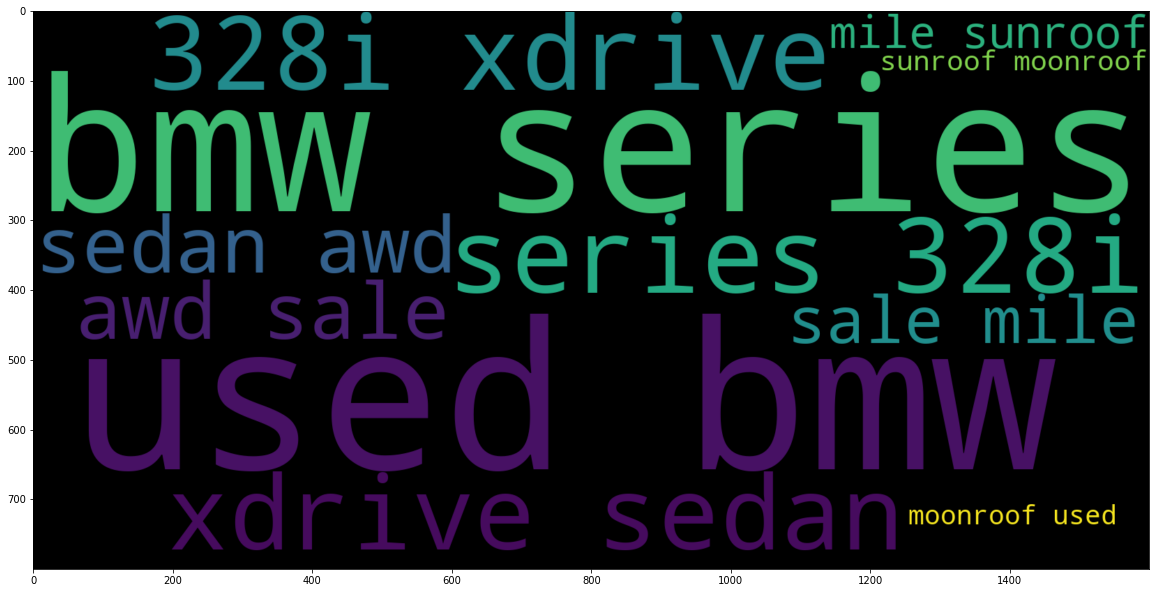

In [31]:
plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(bad))
plt.imshow(wc,interpolation = 'bilinear')

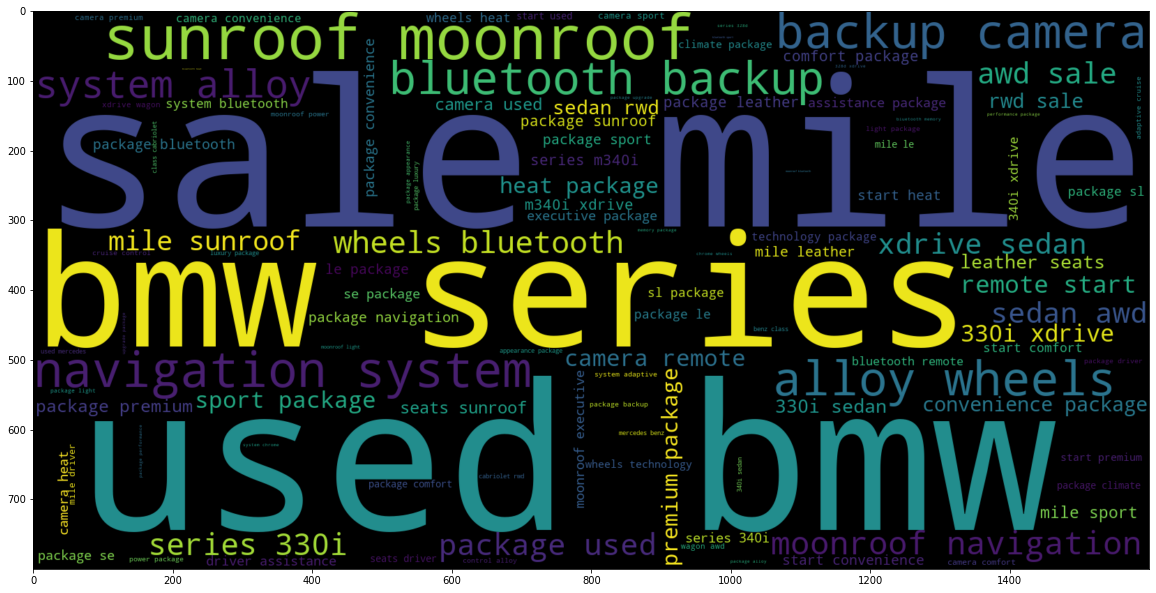

In [32]:
plt.figure(figsize = (20,20)) # # Text Reviews with Good Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good))
plt.imshow(wc,interpolation = 'bilinear')

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [40]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [41]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [42]:
mnb_bow_report = classification_report(y_test,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(y_test,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)

ValueError: Number of classes, 922, does not match size of target_names, 2. Try specifying the labels parameter

In [46]:
import keras
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(Dense(units = 75 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu')) 
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 75)                89850     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 95,196
Trainable params: 95,196
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(cv_train_reviews,y_train , epochs = 10)


Epoch 1/10


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\script_ops.py", line 135, in __call__
    ret = self._func(*args)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\autograph\impl\api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 503, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 503, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 502, in slice_array
    contiguous=contiguous)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training_utils.py", line 53, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training_utils.py", line 53, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training_utils.py", line 53, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) Invalid argument:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\script_ops.py", line 135, in __call__
    ret = self._func(*args)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\autograph\impl\api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 503, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 503, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 502, in slice_array
    contiguous=contiguous)

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training_utils.py", line 53, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training_utils.py", line 53, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\newbee\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training_utils.py", line 53, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_887]

Function call stack:
train_function -> train_function


In [ ]:
model.evaluate(cv_test_reviews,y_test)[1]


In [ ]:
train_data = pd.read_csv('../input/used-cars-price-prediction/train-data.csv')
test_data = pd.read_csv('../input/used-cars-price-prediction/test-data.csv')

In [ ]:
train_data.info()

In [ ]:
train_data.head()

In [ ]:
train_data.tail()

In [ ]:
train_data = train_data.iloc[:,1:]
train_data.head()

In [ ]:
train_data.describe()


In [ ]:
train_data.shape

In [ ]:
train_data['Kilometers_Driven'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))